# Project NLP G1

This project contains 2 datasets:
- Label 0: Real News
- Label 1: Fake News

Importing Libraries

In [23]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import random                              # pseudo-random number generato

Load the DataSet

In [24]:
file_path = 'training_data_lowercase.csv'
dataset = pd.read_csv(file_path, delimiter='\t', header=None, names=["Tag", "Sentence"])

print(dataset['Sentence'].dtype)
print(dataset['Sentence'].head())


object
0    donald trump sends out embarrassing new year‚s...
1    drunk bragging trump staffer started russian c...
2    sheriff david clarke becomes an internet joke ...
3    trump is so obsessed he even has obama‚s name ...
4    pope francis just called out donald trump duri...
Name: Sentence, dtype: object


## Data Exploration

Understanding the Structure of the Dataset

In [25]:
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34152 entries, 0 to 34151
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tag       34152 non-null  int64 
 1   Sentence  34152 non-null  object
dtypes: int64(1), object(1)
memory usage: 533.8+ KB


,Tag,Sentence
0,0,donald trump sends out embarrassing new year‚s...
1,0,drunk bragging trump staffer started russian c...
2,0,sheriff david clarke becomes an internet joke ...
3,0,trump is so obsessed he even has obama‚s name ...
4,0,pope francis just called out donald trump duri...


3) Checking the Class distribution
###### Here we are just counting how many sentences are translated by the machine and how many are translated by a professional

In [26]:
class_distribution = dataset['Tag'].value_counts()
print(class_distribution)

Tag
0    17572
1    16580
Name: count, dtype: int64


4) Analyzing Sentence Lenght
- We add a column to the dataset that calculates the lenght of each sentence
- we look at the summary statisticss for sentence lenght

In [27]:
dataset['Sentence_Length'] = dataset['Sentence'].apply(len)


In [28]:
sentence_length_stats = dataset['Sentence_Length'].describe()
print(sentence_length_stats)

count    34152.000000
mean        74.680839
std         23.460862
min          2.000000
25%         61.000000
50%         70.000000
75%         85.000000
max        279.000000
Name: Sentence_Length, dtype: float64


5) Visualizing the Data

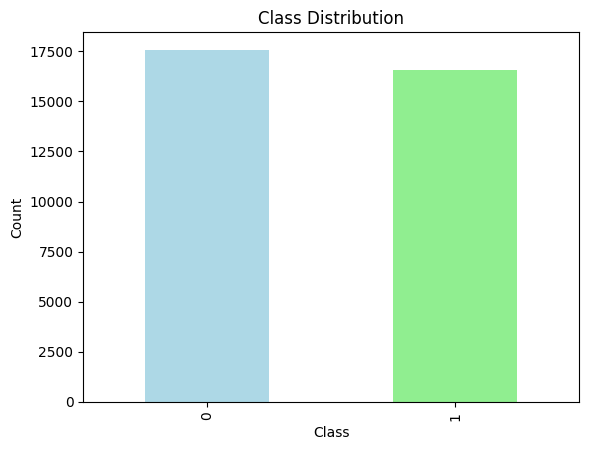

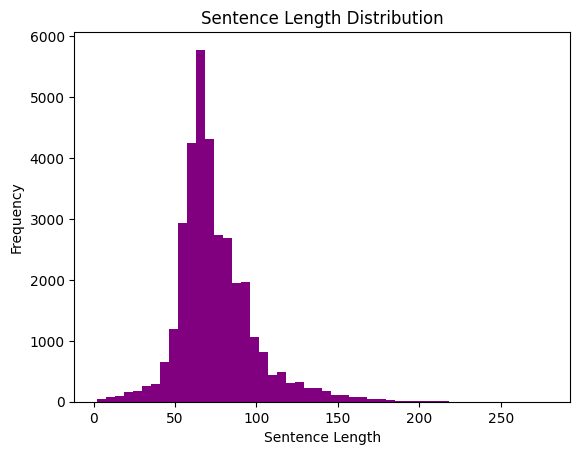

In [29]:
import matplotlib.pyplot as plt

# Class Distribution
dataset['Tag'].value_counts().plot(kind='bar', title="Class Distribution", color=['lightblue', 'lightgreen'])
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Sentence Length Distribution
dataset['Sentence_Length'].plot(kind='hist', bins=50, title="Sentence Length Distribution", color='purple')
plt.xlabel("Sentence Length")
plt.ylabel("Frequency")
plt.show()

## Text Processing

In [30]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

1) Tokenization and Normalization (removing punctuation)

In [31]:

# Step 1: Tokenization and Normalization (lowercasing and removing punctuation)
def preprocess_text(text):

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    return tokens




2) Applying the Preprocessing Function

In [32]:
dataset['Tokenized_Sentence'] = dataset['Sentence'].apply(preprocess_text)


3) Lemmatization

In [33]:

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

dataset['Lemmatized_Sentence'] = dataset['Tokenized_Sentence'].apply(lemmatize_tokens)

dataset.head()



,Tag,Sentence,Sentence_Length,Tokenized_Sentence,Lemmatized_Sentence
0,0,donald trump sends out embarrassing new year‚s...,78,"[donald, trump, sends, out, embarrassing, new,...","[donald, trump, sends, out, embarrassing, new,..."
1,0,drunk bragging trump staffer started russian c...,68,"[drunk, bragging, trump, staffer, started, rus...","[drunk, bragging, trump, staffer, started, rus..."
2,0,sheriff david clarke becomes an internet joke ...,89,"[sheriff, david, clarke, becomes, an, internet...","[sheriff, david, clarke, becomes, an, internet..."
3,0,trump is so obsessed he even has obama‚s name ...,77,"[trump, is, so, obsessed, he, even, has, obama...","[trump, is, so, obsessed, he, even, ha, obamas..."
4,0,pope francis just called out donald trump duri...,69,"[pope, francis, just, called, out, donald, tru...","[pope, francis, just, called, out, donald, tru..."


In [34]:
dataset

,Tag,Sentence,Sentence_Length,Tokenized_Sentence,Lemmatized_Sentence
0,0,donald trump sends out embarrassing new year‚s...,78,"[donald, trump, sends, out, embarrassing, new,...","[donald, trump, sends, out, embarrassing, new,..."
1,0,drunk bragging trump staffer started russian c...,68,"[drunk, bragging, trump, staffer, started, rus...","[drunk, bragging, trump, staffer, started, rus..."
2,0,sheriff david clarke becomes an internet joke ...,89,"[sheriff, david, clarke, becomes, an, internet...","[sheriff, david, clarke, becomes, an, internet..."
3,0,trump is so obsessed he even has obama‚s name ...,77,"[trump, is, so, obsessed, he, even, has, obama...","[trump, is, so, obsessed, he, even, ha, obamas..."
4,0,pope francis just called out donald trump duri...,69,"[pope, francis, just, called, out, donald, tru...","[pope, francis, just, called, out, donald, tru..."
...,...,...,...,...,...
34147,1,tears in rain as thais gather for late king's ...,53,"[tears, in, rain, as, thais, gather, for, late...","[tear, in, rain, a, thai, gather, for, late, k..."
34148,1,pyongyang university needs non-u.s. teachers a...,81,"[pyongyang, university, needs, nonus, teachers...","[pyongyang, university, need, nonus, teacher, ..."
34149,1,philippine president duterte to visit japan ah...,73,"[philippine, president, duterte, to, visit, ja...","[philippine, president, duterte, to, visit, ja..."
34150,1,japan's abe may have won election\tbut many do...,63,"[japans, abe, may, have, won, election, but, m...","[japan, abe, may, have, won, election, but, ma..."


In [35]:
!pip install textblob

!pip install textstat


from textblob import TextBlob
TextBlob()

In [36]:
# Import necessary libraries

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from textblob import TextBlob
from scipy.sparse import hstack

# Apply TextBlob sentiment analysis
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Create a new 'Sentiment' column based on sentiment polarity
dataset['Sentiment'] = dataset['Sentence'].apply(get_sentiment)

# Shift sentiment values from [-1, 1] to [0, 2]
dataset['Sentiment'] = dataset['Sentiment'] + 1

# Step 1: Feature extraction using TfidfVectorizer
tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(dataset['Lemmatized_Sentence'].apply(lambda x: ' '.join(x)))

# Step 2: Feature extraction using CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(dataset['Lemmatized_Sentence'].apply(lambda x: ' '.join(x)))

# Combine TF-IDF features with shifted sentiment polarity for TF-IDF
sentiment_feature_tfidf = dataset['Sentiment'].values.reshape(-1, 1)
X_combined_tfidf = hstack([X_tfidf, sentiment_feature_tfidf])

# Combine CountVectorizer features with shifted sentiment polarity for CountVectorizer
sentiment_feature_count = dataset['Sentiment'].values.reshape(-1, 1)
X_combined_count = hstack([X_counts, sentiment_feature_count])

# Now you can proceed with Naive Bayes and Random Forest using both feature sets

# Labels (Target variable)
y = dataset['Tag']  # Assuming the column name is 'Tag'

# Step 3: Split the data into training and testing sets
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_combined_tfidf, y, test_size=0.2, random_state=42)
X_train_count, X_test_count, y_train, y_test = train_test_split(X_combined_count, y, test_size=0.2, random_state=42)

# Step 4: Define both models
models_tfidf = {
    "Naive Bayes (TF-IDF)": MultinomialNB(),
    "Random Forest (TF-IDF)": RandomForestClassifier(n_estimators=100, random_state=42)
}

models_count = {
    "Naive Bayes (CountVectorizer)": MultinomialNB(),
    "Random Forest (CountVectorizer)": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Step 5: Train and evaluate both models with TF-IDF
print("Evaluating models with TF-IDF features...\n")
for model_name, model in models_tfidf.items():
    # Train the model
    model.fit(X_train_tfidf, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_tfidf)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Classifier Accuracy: {accuracy}")
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n" + "="*60 + "\n")

# Step 6: Train and evaluate both models with CountVectorizer
print("Evaluating models with CountVectorizer features...\n")
for model_name, model in models_count.items():
    # Train the model
    model.fit(X_train_count, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_count)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Classifier Accuracy: {accuracy}")
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n" + "="*60 + "\n")


Evaluating models with TF-IDF features...

Naive Bayes (TF-IDF) Classifier Accuracy: 0.937637241985068
Naive Bayes (TF-IDF) Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3529
           1       0.94      0.93      0.94      3302

    accuracy                           0.94      6831
   macro avg       0.94      0.94      0.94      6831
weighted avg       0.94      0.94      0.94      6831



Random Forest (TF-IDF) Classifier Accuracy: 0.9352949787732396
Random Forest (TF-IDF) Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      3529
           1       0.93      0.94      0.93      3302

    accuracy                           0.94      6831
   macro avg       0.94      0.94      0.94      6831
weighted avg       0.94      0.94      0.94      6831



Evaluating models with CountVectorizer features...

Naive Bayes (CountVectorizer) Clas

## Plotting results

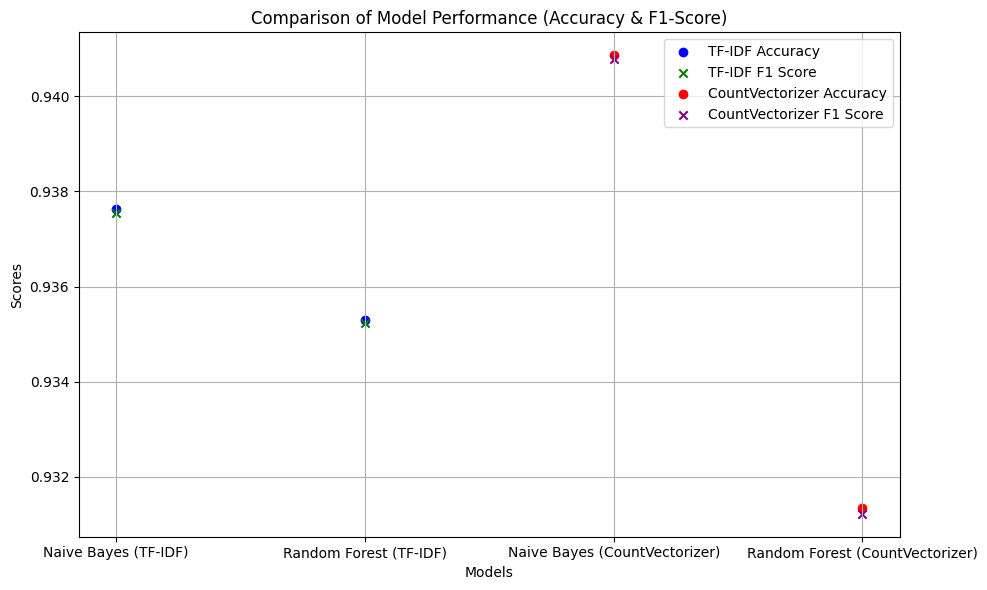

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

# Initialize lists to store the results
model_names_tfidf = []
accuracies_tfidf = []
f1_scores_tfidf = []

model_names_count = []
accuracies_count = []
f1_scores_count = []

# Collect results for models with TF-IDF
print("Collecting results for models with TF-IDF...\n")
for model_name, model in models_tfidf.items():
    # Make predictions
    y_pred = model.predict(X_test_tfidf)
    
    # Accuracy and F1 Score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Store results
    model_names_tfidf.append(model_name)
    accuracies_tfidf.append(accuracy)
    f1_scores_tfidf.append(f1)

# Collect results for models with CountVectorizer
print("Collecting results for models with CountVectorizer...\n")
for model_name, model in models_count.items():
    # Make predictions
    y_pred = model.predict(X_test_count)
    
    # Accuracy and F1 Score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Store results
    model_names_count.append(model_name)
    accuracies_count.append(accuracy)
    f1_scores_count.append(f1)

# Step 3: Plotting results
plt.figure(figsize=(10, 6))

# Plot TF-IDF accuracies and F1-scores
plt.scatter(model_names_tfidf, accuracies_tfidf, marker='o', label='TF-IDF Accuracy', color='blue')
plt.scatter(model_names_tfidf, f1_scores_tfidf, marker='x', label='TF-IDF F1 Score', color='green')

# Plot CountVectorizer accuracies and F1-scores
plt.scatter(model_names_count, accuracies_count, marker='o', label='CountVectorizer Accuracy', color='red')
plt.scatter(model_names_count, f1_scores_count, marker='x', label='CountVectorizer F1 Score', color='purple')

# Add titles and labels
plt.title('Comparison of Model Performance (Accuracy & F1-Score)')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()
